# Generating a Template with Tidal Effects

This notebook makes use of [LAL](https://lscsoft.docs.ligo.org/lalsuite/), the LIGO Algorithm Library. This is a collection of tools for gravitational wave science, including codes to compute gravitational wave templates (which is what we will do in this notebook).

## Install and run lalsim

**Note: this section does not work on Windows**

On Windows you can install lalsuite within the Windows Subsystem for Linux (WSL) and produce the waveform files there.

In [1]:
!pip install lalsuite

In [2]:
!lalsim-inspiral --help

usage: /home/bgiacoma/anaconda3/bin/lalsim-inspiral [options]
options [default values in brackets]:
	-h, --help               	print this message and exit
	-v, --verbose            	verbose output
	-C, --radians            	use radians rather than decimal degrees
	-F, --frequency-domain   	output data in frequency domain
	-c, --condition-waveform 	apply waveform conditioning
	-P, --amp-phase          	output data as amplitude and phase
	-a APPROX, --approximant=APPROX 
		approximant [TaylorT1]
	-w WAVEFORM, --waveform=WAVEFORM 
		waveform string giving both approximant and order
	-D domain, --domain=DOMAIN      
		domain for waveform generation when both are available
		{"time", "freq"} [use natural domain for output]
	-O PHASEO, --phase-order=PHASEO 
		twice pN order of phase (-1 == highest) [-1]
	-o AMPO, --amp-order=AMPO       
		twice pN order of amplitude (-1 == highest) [-1]
	-u PHIREF, --phiRef=PHIREF      
		reference phase in degrees [0]
	-U PERIANOM, --periastron-anomaly=PERI

We will now use lalsim-inspiral to compute the gravitational waves produced by two equal-mass systems with the same mass: one composed of two black holes and one composed of two neutron stars. Both systems are assumed to be at a distance of 100 Mpc.

See Table 1 of [Dietrich et al 2019](https://ui.adsabs.harvard.edu/abs/2019PhRvD.100d4003D/abstract) for the choice of the tidal deformability for the Neutron Stars. In this case we are assuming the H4 equation of state.

We will use IMRPhenomD_NRTidalv2 since this is one of the fastest approximant including also tidal effects (crucial for neutron star waveforms).

In [3]:
!lalsim-inspiral -a IMRPhenomD_NRTidalv2 --domain=time --m1=1.3717 --m2=1.3717 --distance=100 --tidal-lambda1=1013.4 --tidal-lambda2=1013.4 --f-min=50 >& M1.3717_L1013.4_F50_D100_IMRPhenomD_NRTidalv2.txt
!lalsim-inspiral -a IMRPhenomD_NRTidalv2 --domain=time --m1=1.3717 --m2=1.3717 --distance=100 --tidal-lambda1=0.0 --tidal-lambda2=0.0 --f-min=50 >& M1.3717_L0000_F50_D100_IMRPhenomD_NRTidalv2.txt


In [4]:
!head M1.3717_L1013.4_F50_D100_IMRPhenomD_NRTidalv2.txt

# time (s)	h_+ (strain)	h_x (strain)
-17.701477051	-0.000000000000000000e+00	-0.000000000000000000e+00
-17.701416016	-1.292522826893871741e-33	-1.626848711173226460e-30
-17.701354981	1.129827478251155452e-31	-6.507242610371642332e-30
-17.701293946	5.200308355001126660e-31	-1.463590250669847712e-29
-17.701232910	1.396846957693818494e-30	-2.600081643214081913e-29
-17.701171875	2.919994744773674405e-30	-4.058324740926569842e-29
-17.701110840	5.265384734725681812e-30	-5.835774802341603026e-29
-17.701049805	8.608053338674390155e-30	-7.929218178961642264e-29
-17.700988770	1.312194248788094102e-29	-1.033477513013360555e-28


## Plot the templates

In [5]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

In [6]:
lin_data_H4 = np.genfromtxt("M1.3717_L1013.4_F50_D100_IMRPhenomD_NRTidalv2.txt", skip_header=1)
lin_data_BH = np.genfromtxt("M1.3717_L0000_F50_D100_IMRPhenomD_NRTidalv2.txt", skip_header=1)

(-1e-22, 1e-22)

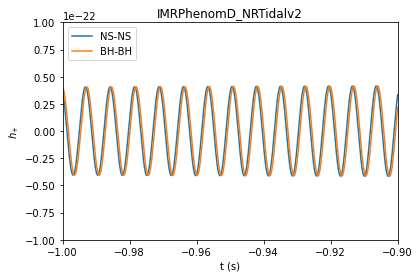

In [7]:
fig, ax = plt.subplots()
ax.plot(lin_data_H4[:,0],lin_data_H4[:,1], label='NS-NS')
ax.plot(lin_data_BH[:,0],lin_data_BH[:,1], label='BH-BH')
ax.set_xlabel('t (s)')  # Add an x-label to the axes.
ax.set_ylabel('$h_\plus$')  # Add a y-label to the axes.
ax.set_title("IMRPhenomD_NRTidalv2")  # Add a title to the axes.
ax.legend(loc='upper left')  # Add a legend.
ax.set_xlim([-1.0, -0.9])
ax.set_ylim([-1e-22, 1e-22])

In [8]:
fig.savefig('plot_GW_lalsim_tidal_fig1.jpg')

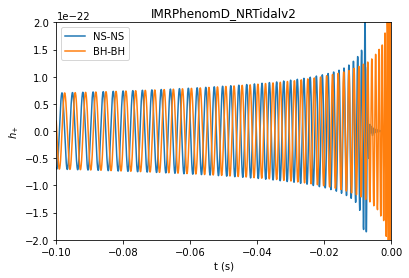

In [9]:
ax.set_xlim([-0.1, -0.0])
ax.set_ylim([-2e-22, 2e-22])
fig

In [10]:
fig.savefig('plot_GW_lalsim_tidal_fig2.jpg')

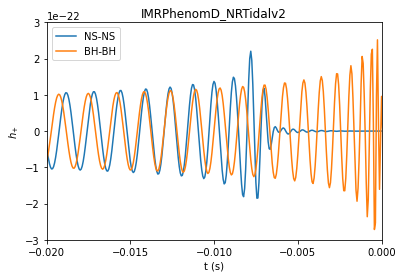

In [11]:
ax.set_xlim([-0.02, 0.0])
ax.set_ylim([-3e-22, 3e-22])
ax.locator_params(axis="x", nbins=4)
fig

In [12]:
fig.savefig('plot_GW_lalsim_tidal_fig3.jpg')